In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import yfinance as yf

#Importing activities

In [ ]:
#Importing Data

# Defining constants and assumptions

In [ ]:
# key factors anual figures
S, d, sig = 1500000, 0.3, 0.5
In = S*d*sig   # EMI and investments paid towards loan
Ioc = S*d   # Additional invested amount
#Loan factors
Li, Lt, P, pplot = 0.08, 42, 5500000, 5500000
#Financial Markets
Ar, J = 0.09, 0.08

In [ ]:
# Data frame
df = pd.DataFrame( columns=('EMI', 'invest', 'balance', 'investOnly'))

# Locking first row
df.loc[0] = [In,In,P,Ioc]

In [ ]:
for i in range(1, Lt+1):
    e = In + (df.loc[i-1, 'invest']*J)
    I = (In + (df.loc[i-1, 'invest']*(1-J))) * (1+Ar)
    P = (df.loc[i-1, 'balance'] - e) * (1+Li)
    Io = (df.loc[i-1, 'investOnly']+Ioc)*(1+Ar)

    df.loc[i] = [e, I, P,Io]

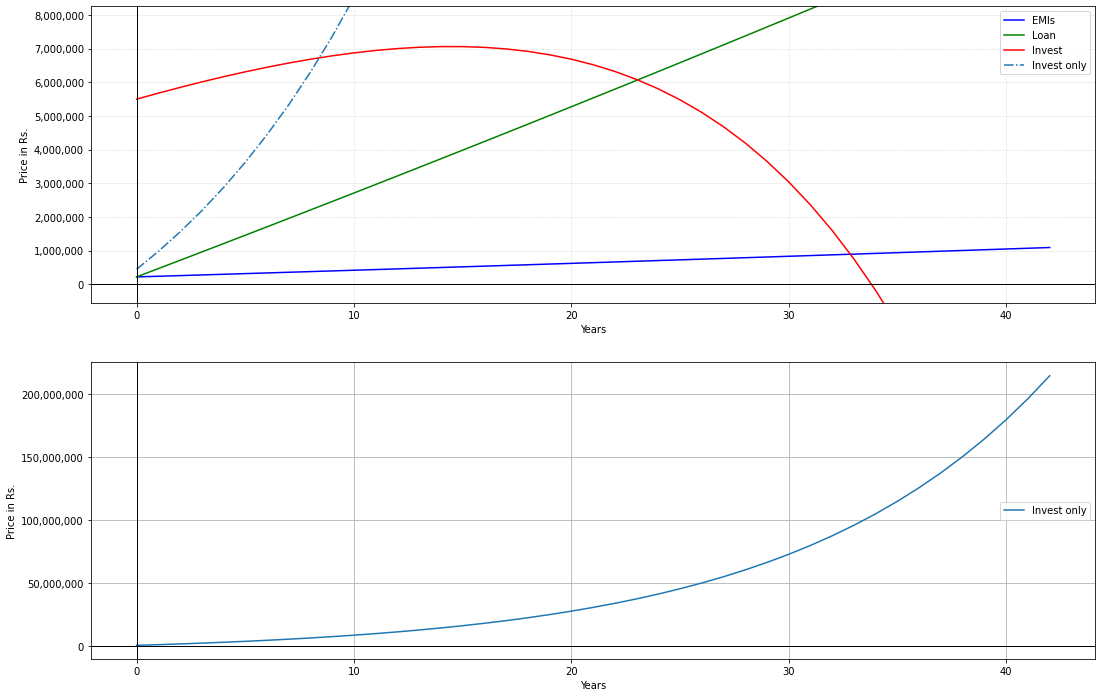

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,12))

ax[0].plot(df['EMI'], color='b', label='EMIs')
ax[0].plot(df['invest'], color='g', label='Loan')
ax[0].plot(df['balance'], color='r', label='Invest')
ax[0].plot(df['investOnly'], linestyle='-.', label='Invest only')
ax[0].axhline(y=0, color='black', linewidth=1)
ax[0].axvline(x=0, color='black', linewidth=1)
ax[0].grid(True, linestyle=':', linewidth=0.5)
ax[0].set_ylim(-pplot*0.1, pplot*1.5)
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Price in Rs.')
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].legend()

ax[1].plot(df['investOnly'], label='Invest only')
ax[1].axhline(y=0, color='black', linewidth=1)
ax[1].axvline(x=0, color='black', linewidth=1)
ax[1].grid(True)
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Price in Rs.')
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].legend()

In [ ]:
df.loc[Lt]

EMI           1.096338e+06
invest        1.116747e+07
balance      -1.195429e+07
investOnly    2.147234e+08
Name: 42, dtype: float64

#Adding Browniean motion (randomeness) to interest rates & returns

[0.09       0.08290763 0.09076577 0.09144369 0.09232164 0.09261729
 0.09592576 0.09652787 0.09541213 0.09487793 0.09297337 0.09979776
 0.1000598  0.09991117 0.10604993 0.10972842 0.11426058 0.12356808
 0.1268686  0.12885252 0.12528274 0.12775349 0.1339235  0.13173059
 0.13102017 0.13314428 0.13831255 0.13688766 0.13206574 0.12784772
 0.13320999 0.13749676 0.12747625 0.12825228 0.12193037 0.12439657
 0.12294653 0.12336808 0.13270643 0.12790338 0.1286201  0.12846769
 0.12216598]


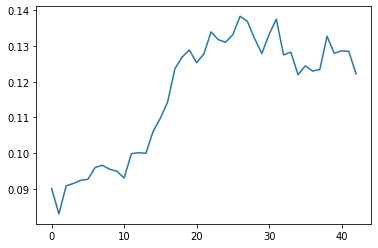

In [ ]:
# Set constant value and Brownian motion parameters
x0 = Ar
mu = 0.0005
sigma = 0.005

# Generate 42 Brownian motion values
dt = 1
dB = np.sqrt(dt) * np.random.normal(size=Lt)

# Initialize array to store results
ArV = np.zeros(Lt+1)
ArV[0] = x0

# Loop through time steps and generate values with Brownian motion added
for t in range(1, Lt+1):
    ArV[t] = ArV[t-1] + mu*dt + sigma*dB[t-1]

# Print the result
print(ArV)
plt.plot(ArV)

[0.08       0.09645729 0.10231737 0.09339469 0.08099762 0.08414861
 0.09908441 0.09485519 0.10157808 0.10439794 0.10096009 0.08707593
 0.10099816 0.09567776 0.10234957 0.09281643 0.09721874 0.12085293
 0.13141158 0.12795342 0.12651474 0.11144541 0.11066964 0.1147301
 0.11400855 0.12286272 0.13015127 0.11550377 0.12378033 0.12584092
 0.12890934 0.13108501 0.1150458  0.10857821 0.1100489  0.1108876
 0.10116511 0.08935485 0.08933026 0.09821089 0.09157124 0.08928385
 0.09970923]


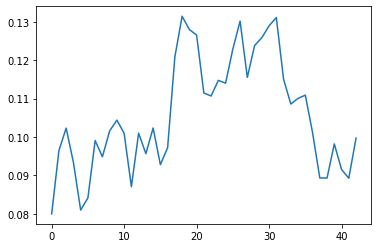

In [ ]:
# Set constant value and Brownian motion parameters
x0 = Li
mu = 0.0005
sigma = 0.01

# Generate 42 Brownian motion values
dt = 1
dB = np.sqrt(dt) * np.random.normal(size=Lt)

# Initialize array to store results
LiV = np.zeros(Lt+1)
LiV[0] = x0

# Loop through time steps and generate values with Brownian motion added
for t in range(1, Lt+1):
    LiV[t] = LiV[t-1] + mu*dt + sigma*dB[t-1]

# Print the result
print(LiV)
plt.plot(LiV)

In [ ]:
# fluctuating Data frame
df2 = pd.DataFrame( columns=('EMI', 'invest', 'balance', 'investOnly'))

# Locking first row
df2.loc[0] = [In,In,P,Ioc]

In [ ]:
for i in range(1, Lt+1):
    e = In + (df2.loc[i-1, 'invest']*J)
    I = (In + (df2.loc[i-1, 'invest']*(1-J))) * (1+ArV[i])
    P = (df2.loc[i-1, 'balance'] - e) * (1+LiV[i])
    Io = (df2.loc[i-1, 'investOnly']+Ioc)*(1+ArV[i])

    df2.loc[i] = [e, I, P,Io]

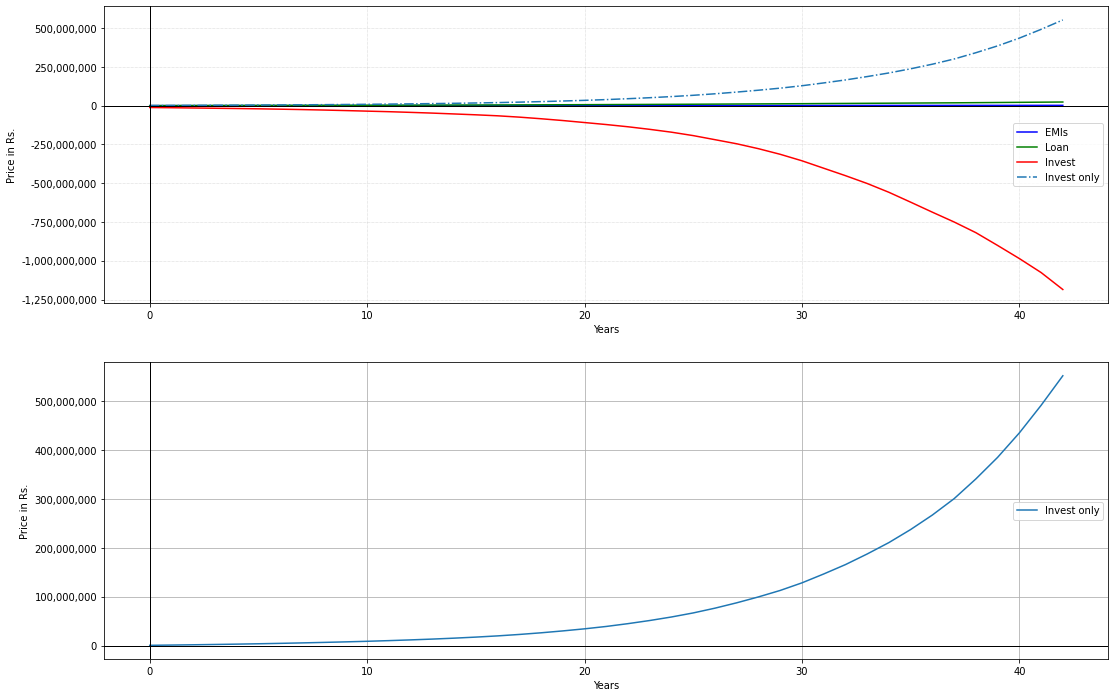

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18,12))

ax[0].plot(df2['EMI'], color='b', label='EMIs')
ax[0].plot(df2['invest'], color='g', label='Loan')
ax[0].plot(df2['balance'], color='r', label='Invest')
ax[0].plot(df2['investOnly'], linestyle='-.', label='Invest only')
ax[0].axhline(y=0, color='black', linewidth=1)
ax[0].axvline(x=0, color='black', linewidth=1)
ax[0].grid(True, linestyle=':', linewidth=0.5)
#ax[0].set_ylim(-pplot*0.1, pplot*1.5)
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Price in Rs.')
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[0].legend()

ax[1].plot(df2['investOnly'], label='Invest only')
ax[1].axhline(y=0, color='black', linewidth=1)
ax[1].axvline(x=0, color='black', linewidth=1)
ax[1].grid(True)
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Price in Rs.')
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].legend()